In [10]:
import numpy
import netCDF4

dataDIR = 'P:/projects/SILO/'

maskName = 'mask_qld.nc'
dataVarName = 'et_morton_wet'


# Load the regional mask
with netCDF4.Dataset(dataDIR + maskName, 'r') as mask_dataset:
    mask_data = mask_dataset.variables['mask'][:]

# Initialise the results list
results = []
resDict = {}

# Loop over years
#for year in range(1961, 1990):
# range uses start and STOP values, so last value isn't processed
for year in range(2000, 2002):
    print('Current year: ' + str(year))
    # Load the monthly rainfall data for all months in the year
    #with netCDF4.Dataset('{:d}.monthly_rain.nc'.format(year), 'r') as dataset:
    print('Processing: ' + dataDIR + '{:d}.'.format(year) + dataVarName + '.nc')
    with netCDF4.Dataset(dataDIR + '{:d}.'.format(year) + dataVarName + '.nc', 'r') as dataset:
        data = dataset.variables[dataVarName][:]
        # Apply regional mask to the data
        data.mask = mask_data.mask
        # Calculate the annual regional average rainfall
        # by computing the average across all months
        # and all grid points within the mask
        average = numpy.mean(data)
    # Append result to the list
    results.append(average)
    resDict[year] = average

# Output the annual average rainfall for all years
print(results)
print(resDict)

Current year: 2000
Processing: P:/projects/SILO/2000.et_morton_wet.nc
Current year: 2001
Processing: P:/projects/SILO/2001.et_morton_wet.nc
[4.500851554877495, 4.8058145193910065]
{2000: 4.500851554877495, 2001: 4.8058145193910065}


In [11]:
#with netCDF4.Dataset(dataDIR + '2000.et_morton_wet.nc', 'r') as mask_dataset:
#    for day in range(1, 365):
        
file = 'P:/projects/SILO/2001.et_morton_wet.nc' #single, explicit file

with netCDF4.Dataset(file) as src:       
    for name, variable in src.variables.items():            
        for attrname in variable.ncattrs():
           print("{} -- {}".format(attrname, variable.getncattr(attrname)))


long_name -- latitude
standard_name -- latitude
units -- degrees_north
axis -- Y
long_name -- longitude
standard_name -- longitude
units -- degrees_east
axis -- X
units -- days since 2001-01-01
calendar -- standard
axis -- T
_FillValue -- -32768
scale_factor -- 0.1
units -- mm
long_name -- Mortons estimate of wet-environment areal evapotranspiration over land
add_offset -- 0.0
grid_mapping_name -- latitude_longitude
longitude_of_prime_meridian -- 0.0
long_name -- Coordinate reference system
semi_major_axis -- 6378137.0
inverse_flattening -- 298.257223563


In [33]:
#from netCDF4 import Dataset

file = 'P:/projects/SILO/2001.et_morton_wet.nc' #single, explicit file
theDataSet = netCDF4.Dataset(file, 'r')
#print(theDataSet)

lats = theDataSet.variables['lat']
lons = theDataSet.variables['lon']
times = theDataSet.variables['time']
#print(lats[:])
#print(lons[:])
#print(times[:])


print(len(lats))
#print('first lats: ' + lats.getValue())
print('first lats: ' + str(lats[:1]))
print('last lats: ' + str(lats[len(lats)-1:]))
print(len(lons))
print('first lons: ' + str(lons[:1]))
print('last lons: ' + str(lons[len(lons)-1:]))
print(len(times))
print('first times: ' + str(times[:1]))
print('last times: ' + str(times[len(times)-1:]))


theDataSet.close()

681
first lats: [-44.]
last lats: [-10.]
841
first lons: [112.]
last lons: [154.]
365
first times: [0.]
last times: [364.]


Driver:  HDF5Image HDF5 Dataset
Size is  841 681
Bands =  365
Coordinate System is: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]
GetGeoTransform() =  (112.0, 0.05, 0.0, -10.0, 0.0, 0.05)
2nd GetGeoTransform() =  (112.0, 0.05, 0.0, -10.0, 0.0, 0.05)
Coordinate System 2 is: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]
[ RASTER BAND COUNT ]:  365
[ GETTING BAND ]:  1
[ STATS ] =  Minimum=18.000, Maximum=76.000, Mean=60.777, StdDev=13.745
0.1 
[ GETTING BAND ]:  2
[ STATS ] =  Minimum=37.000, Maximum=79.000, Mean=65.911, StdDev=8.750
0.1 
[ GETTING BAND ]:  3
[ STATS ] =  M

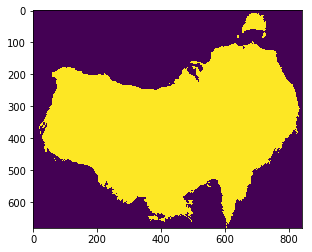

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
from osgeo import gdal, osr
import datetime

file = 'P:/projects/SILO/2001.et_morton_wet.nc' #single, explicit file

#dStart = date(YYYY, MM, DD)
dStart = date(2001, 1, 1)

#scaleFactor = 0.1
#theDataSet = netCDF4.Dataset(file, 'r')

#data=theDataSet.variables['et_morton_wet'][:]
#print(type(data))
#print(data.shape)
#plt.imshow(data)
#plt.show()
#f.close()


datafile = gdal.Open(file)
print( "Driver: ",datafile.GetDriver().ShortName, datafile.GetDriver().LongName)
print( "Size is ", datafile.RasterXSize, datafile.RasterYSize)
print( "Bands = ", datafile.RasterCount)
print( "Coordinate System is:", datafile.GetProjectionRef ())
print( "GetGeoTransform() = ", datafile.GetGeoTransform ())
#print( "GetMetadata() = ", datafile.GetMetadata ())

#zone_ds.SetGeoTransform((x_min, pixel_width, 0, y_max, 0, pixel_height))
datafile.SetGeoTransform((112.0, 0.05, 0, -10.0, 0, 0.05))
print( "2nd GetGeoTransform() = ", datafile.GetGeoTransform ())

srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)

datafile.SetProjection(srs.ExportToWkt())

print( "Coordinate System 2 is:", datafile.GetProjectionRef ())

print("[ RASTER BAND COUNT ]: ", datafile.RasterCount)

#for band in range( datafile.RasterCount ):
for band in range( 4 ):
    dateAdd = band
    dateNow = dStart + datetime.timedelta(days=dateAdd)
    
    dateForFileName = str(dateNow.year) + str(dateNow.month).zfill(2) + str(dateNow.day).zfill(2)
    
    band += 1
    print("[ GETTING BAND ]: ", band)
    srcband = datafile.GetRasterBand(band)
    
    if srcband is None:
        continue
    
    #srcband.SetNoDataValue(-32768.0)

    stats = srcband.GetStatistics( True, True )
    if stats is None:
        continue

    print("[ STATS ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % ( stats[0], stats[1], stats[2], stats[3] ))
    
    #md = srcband.GetMetadata()
    md = srcband.GetMetadataItem('et_morton_wet_scale_factor')
    print(md)
    
    scaleFactor = float(md)
    
    #rasterOutputFile = 'P:/projects/SILO/mwet/2000/tester_' + str(band) + '_mwet.tif'
    rasterOutputFile = 'P:/projects/SILO/mwet/2000/' + dateForFileName + '_mwet.tif'
    outRaster = gdal.GetDriverByName("GTiff").Create(rasterOutputFile, datafile.RasterXSize, datafile.RasterYSize, 1, gdal.GDT_Float32)
    #outRaster = gdal.GetDriverByName("AAIGrid").Create(rasterOutputFile, datafile.RasterXSize, datafile.RasterYSize, 1, gdal.GDT_Float32)
    #outRaster.SetGeoTransform((112.0, 0.05, 0, -10.0, 0, 0.05))
    outRaster.SetGeoTransform((112.0, 0.05, 0, -44.0, 0, 0.05))
    outBand = outRaster.GetRasterBand(1)
    #outBand.SetNoDataValue(-32768.0 * scaleFactor)
    outBand.WriteArray(srcband.ReadAsArray() * scaleFactor)
    outBand.SetNoDataValue(-3276.8)
    #outBand.SetNoDataValue(-32768.0 * scaleFactor)
    outRaster.SetProjection(srs.ExportToWkt())
    outBand.FlushCache()
    
    
bnd1 = datafile.GetRasterBand(1)

##printing this interferes with the SetNoDataValue above, inside the loop. Strange.
#print("NoData: " + str(bnd1.GetNoDataValue()))
bnd1.SetNoDataValue(-32768.0)
#bnd1Arr = datafile.GetRasterBand(1).ReadAsArray()
bnd1Arr = bnd1.ReadAsArray()

#print("This: " + bnd1.GetGeoTransform())

plt.imshow(bnd1Arr)
plt.show()